# import dataset from roboflow and unzip it

In [1]:
!pip install roboflow

from roboflow import Roboflow
from google.colab import userdata
API_KEY=userdata.get('robowflowApiKey')
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("tensinguktrial").project("data-tables")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to data-tables-1 in yolov11:: 100%|██████████| 32714/32714 [00:16<00:00, 2019.73it/s]


In [2]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Counting the number of classes in each subfolder

In [3]:
# Function to count class IDs in a single file
def count_classes_in_file(file_path):
    class_counts = Counter()
    with open(file_path, 'r') as f:
        for line in f:
            # Split line and get the class ID (first value in each line)
            class_id = line.split()[0]
            class_counts[class_id] += 1
    return class_counts

In [4]:
# Function to count class IDs in all files in a folder
def count_classes_in_folder(folder_path):
    total_counts = Counter()
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            total_counts.update(count_classes_in_file(file_path))
    return total_counts

In [5]:
trainImages=len(os.listdir("/content/data-tables-1/train/images"))
testImages=len(os.listdir("/content/data-tables-1/test/images"))
validationImages=len(os.listdir("/content/data-tables-1/valid/images"))
print("train images ",trainImages)
print("test images ",testImages)
print("validation images ",validationImages)
allImages=trainImages+testImages+validationImages
print("all images ",allImages)

train images  15490
test images  430
validation images  431
all images  16351


# counting classes in train subset

[59976, 8954, 6200]


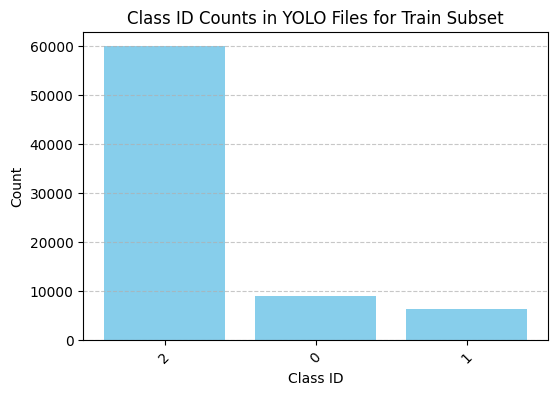

In [6]:
# Folder containing YOLO text files
folder_path = "/content/data-tables-1/train/labels"  # Replace with your folder path

# Count the class occurrences
class_counts = count_classes_in_folder(folder_path)

# Prepare data for plotting
class_ids = list(class_counts.keys())
counts = list(class_counts.values())
print(counts)
# Plot the result
plt.figure(figsize=(6, 4))
plt.bar(class_ids, counts, color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Class ID Counts in YOLO Files for Train Subset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
print("data inside train file (text, table, figure) ",counts)

data inside train file (text, table, figure)  [59976, 8954, 6200]


# counting classes in test subset

[1650, 260, 143]


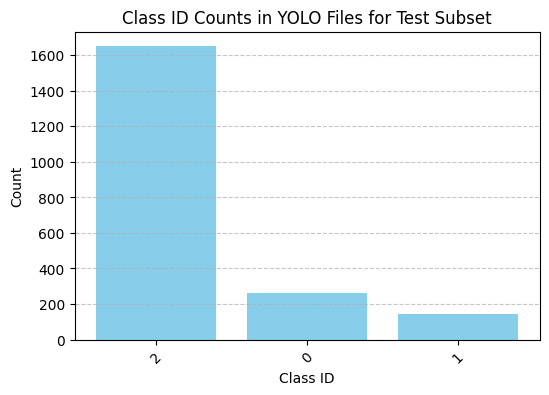

In [8]:
# Folder containing YOLO text files
folder_path = "/content/data-tables-1/test/labels"  # Replace with your folder path

# Count the class occurrences
class_counts = count_classes_in_folder(folder_path)

# Prepare data for plotting
class_ids = list(class_counts.keys())
counts = list(class_counts.values())
print(counts)
# Plot the result
plt.figure(figsize=(6, 4))
plt.bar(class_ids, counts, color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Class ID Counts in YOLO Files for Test Subset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
print("data inside test file (text, table, figure) ",counts)

data inside test file (text, table, figure)  [1650, 260, 143]


# counting classes in validation subset

[1685, 149, 250]


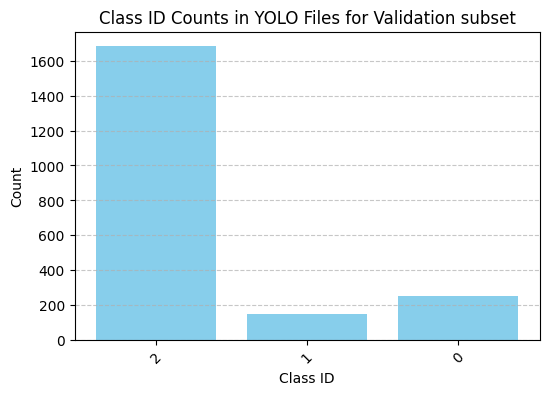

In [10]:
# Folder containing YOLO text files
folder_path = "/content/data-tables-1/valid/labels"  # Replace with your folder path

# Count the class occurrences
class_counts = count_classes_in_folder(folder_path)

# Prepare data for plotting
class_ids = list(class_counts.keys())
counts = list(class_counts.values())
print(counts)
# Plot the result
plt.figure(figsize=(6, 4))
plt.bar(class_ids, counts, color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Class ID Counts in YOLO Files for Validation subset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
print("data inside validation file (text, table, figure) ",counts)

data inside validation file (text, table, figure)  [1685, 149, 250]


In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 22.7 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

results = model.train(data="/content/data-tables-1/data.yaml", epochs=10, imgsz=640, batch=16, plots=True, device=0)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data-tables-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/data-tables-1/train/labels... 15490 images, 52 backgrounds, 0 corrupt: 100%|██████████| 15490/15490 [00:08<00:00, 1917.65it/s]


train: New cache created: /content/data-tables-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/data-tables-1/valid/labels... 431 images, 2 backgrounds, 0 corrupt: 100%|██████████| 431/431 [00:00<00:00, 697.81it/s]

val: New cache created: /content/data-tables-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.61G     0.5615      1.269     0.9755         14        640: 100%|██████████| 969/969 [06:20<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]

                   all        431       2084      0.884      0.849      0.922      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.41G     0.4488     0.7668     0.9105          5        640: 100%|██████████| 969/969 [06:28<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        431       2084      0.876       0.84      0.917        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.4G     0.4058     0.6739     0.8933         11        640: 100%|██████████| 969/969 [06:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        431       2084      0.886      0.834      0.907      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.41G     0.3641     0.6123     0.8774          9        640: 100%|██████████| 969/969 [06:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.88it/s]

                   all        431       2084      0.879      0.862      0.935      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.41G     0.3278     0.5641      0.865         10        640: 100%|██████████| 969/969 [06:10<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]

                   all        431       2084      0.929      0.909      0.964      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.41G     0.2969     0.5307     0.8532          8        640: 100%|██████████| 969/969 [06:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]

                   all        431       2084      0.944       0.92      0.966      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.38G     0.2769     0.5013     0.8455          9        640: 100%|██████████| 969/969 [06:10<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]

                   all        431       2084      0.939       0.93       0.97      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.41G     0.2554     0.4694     0.8372         11        640: 100%|██████████| 969/969 [06:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.99it/s]

                   all        431       2084      0.931      0.926      0.969      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.41G     0.2378     0.4452     0.8314         12        640: 100%|██████████| 969/969 [06:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        431       2084      0.931      0.934      0.973      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.41G     0.2232     0.4218     0.8271          9        640: 100%|██████████| 969/969 [06:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        431       2084      0.948      0.942      0.975      0.947



10 epochs completed in 1.051 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.44it/s]


                   all        431       2084      0.948      0.942      0.975      0.947
                figure        196        250      0.976      0.976      0.991      0.978
                 table        106        149      0.933      0.941      0.965      0.949
                  text        422       1685      0.934      0.909       0.97      0.914
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train


# result training

# **F1-Confidence curve**





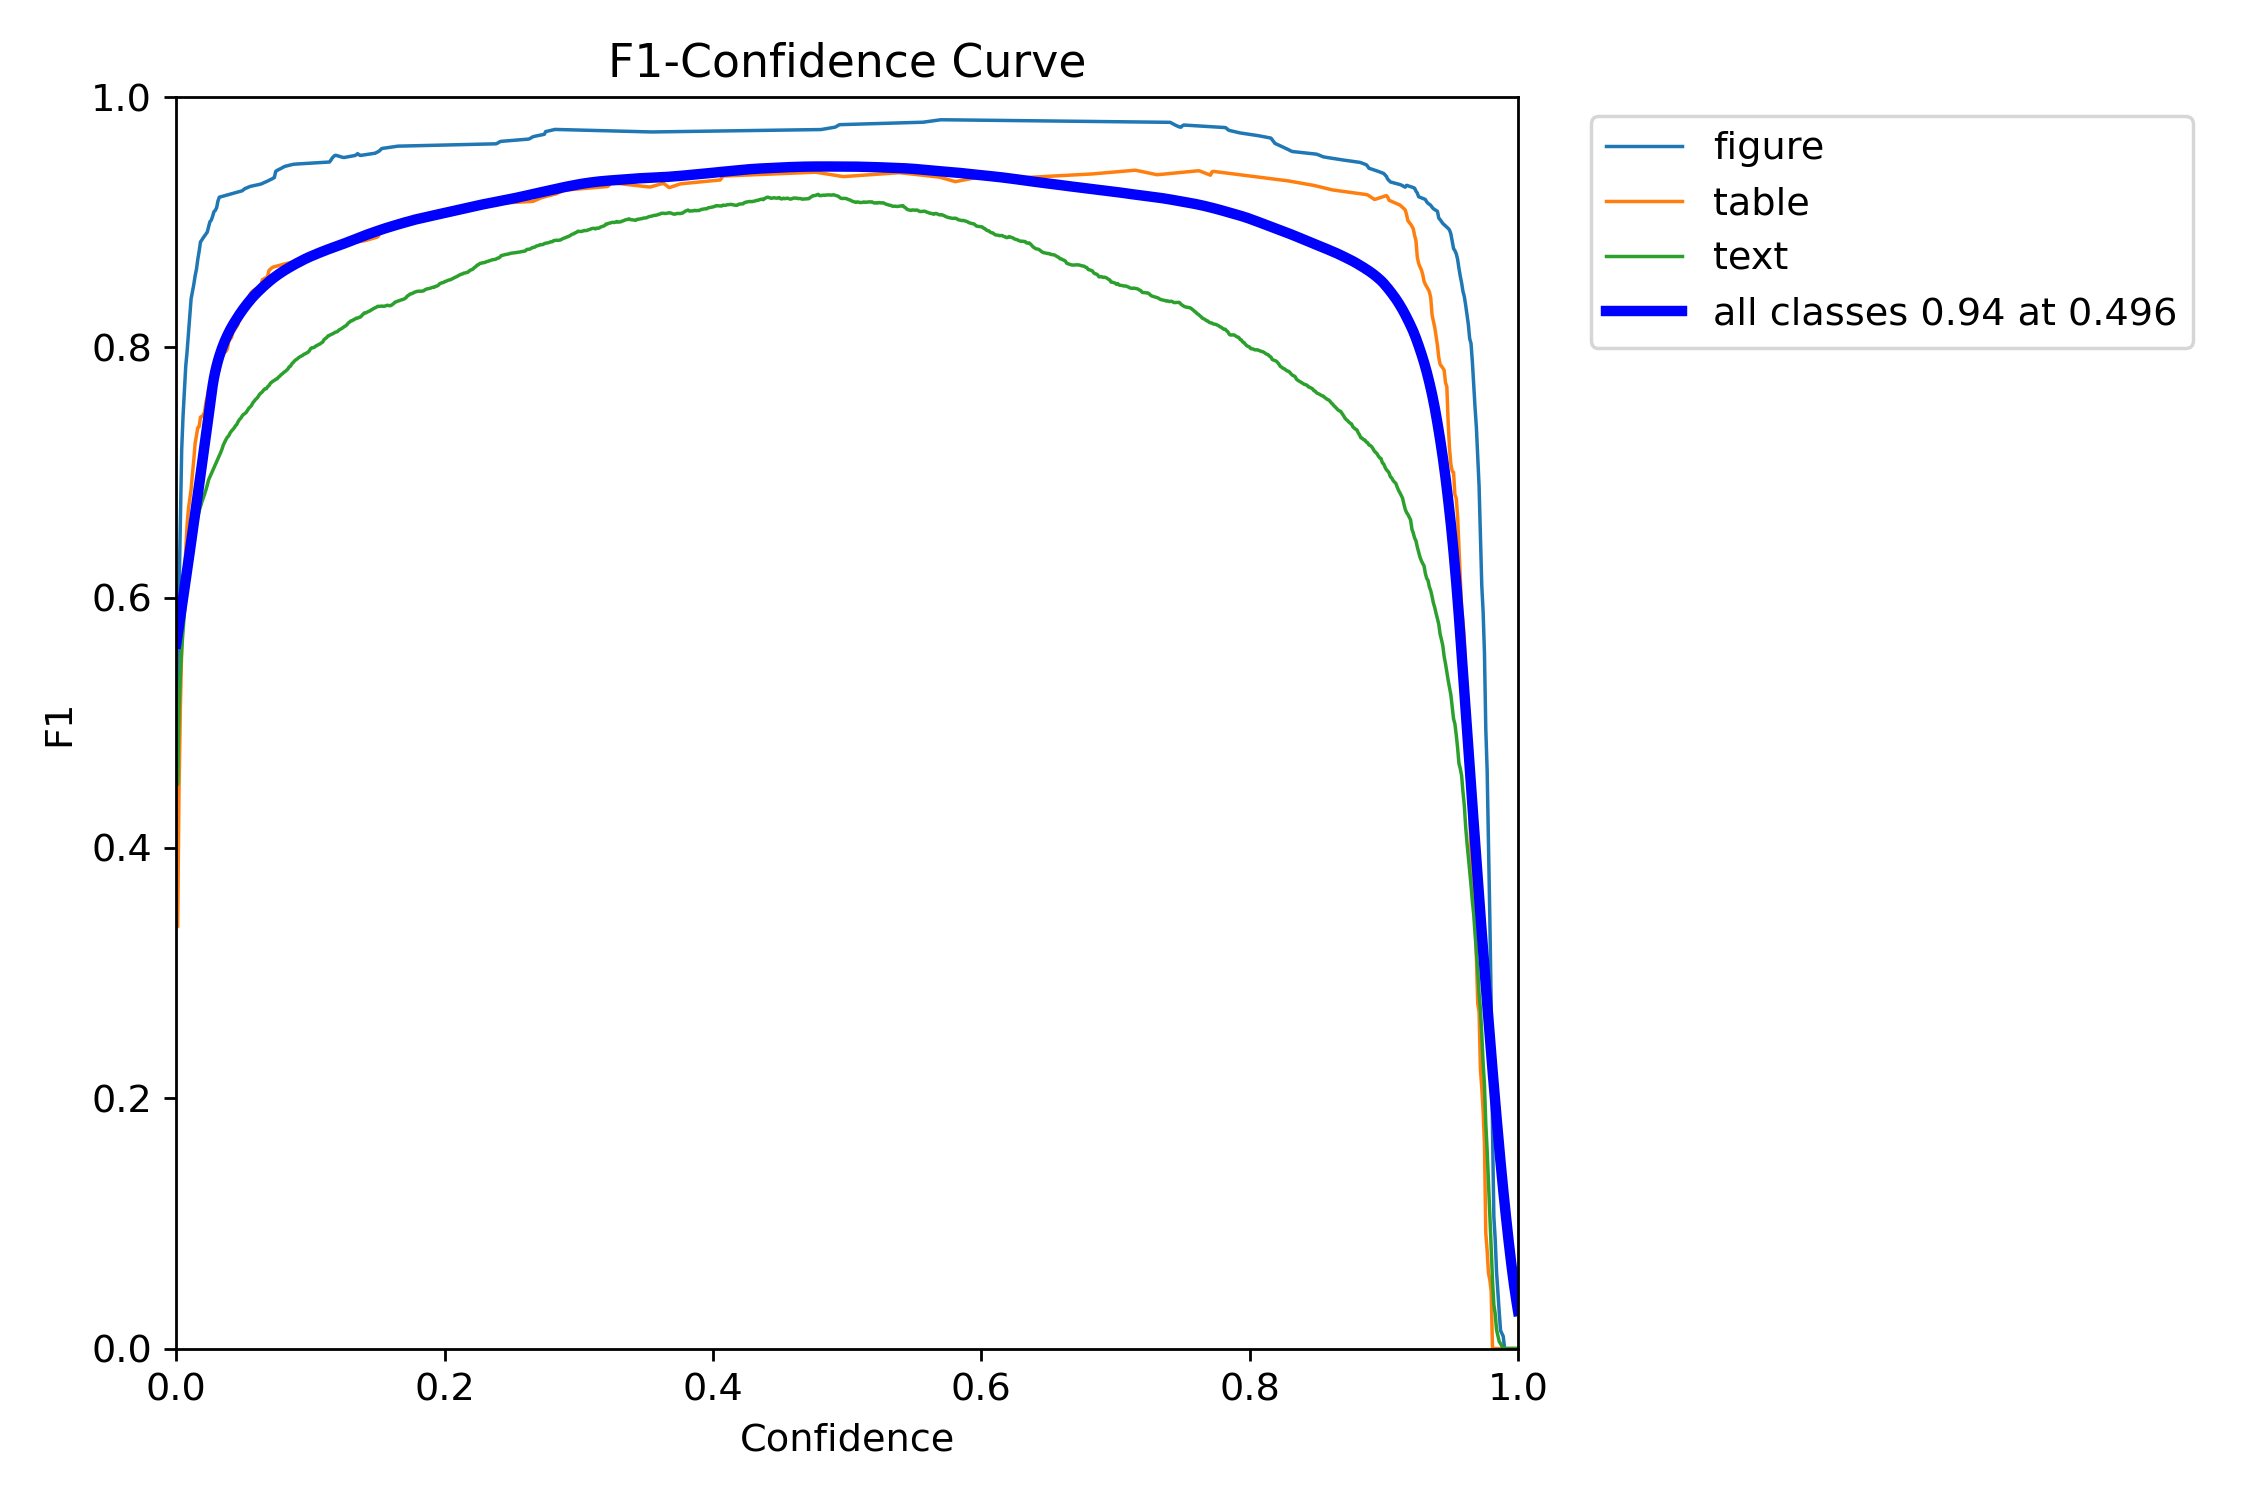

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename="/content/runs/detect/train/F1_curve.png", width=700)

**Recall-Confidence curve**

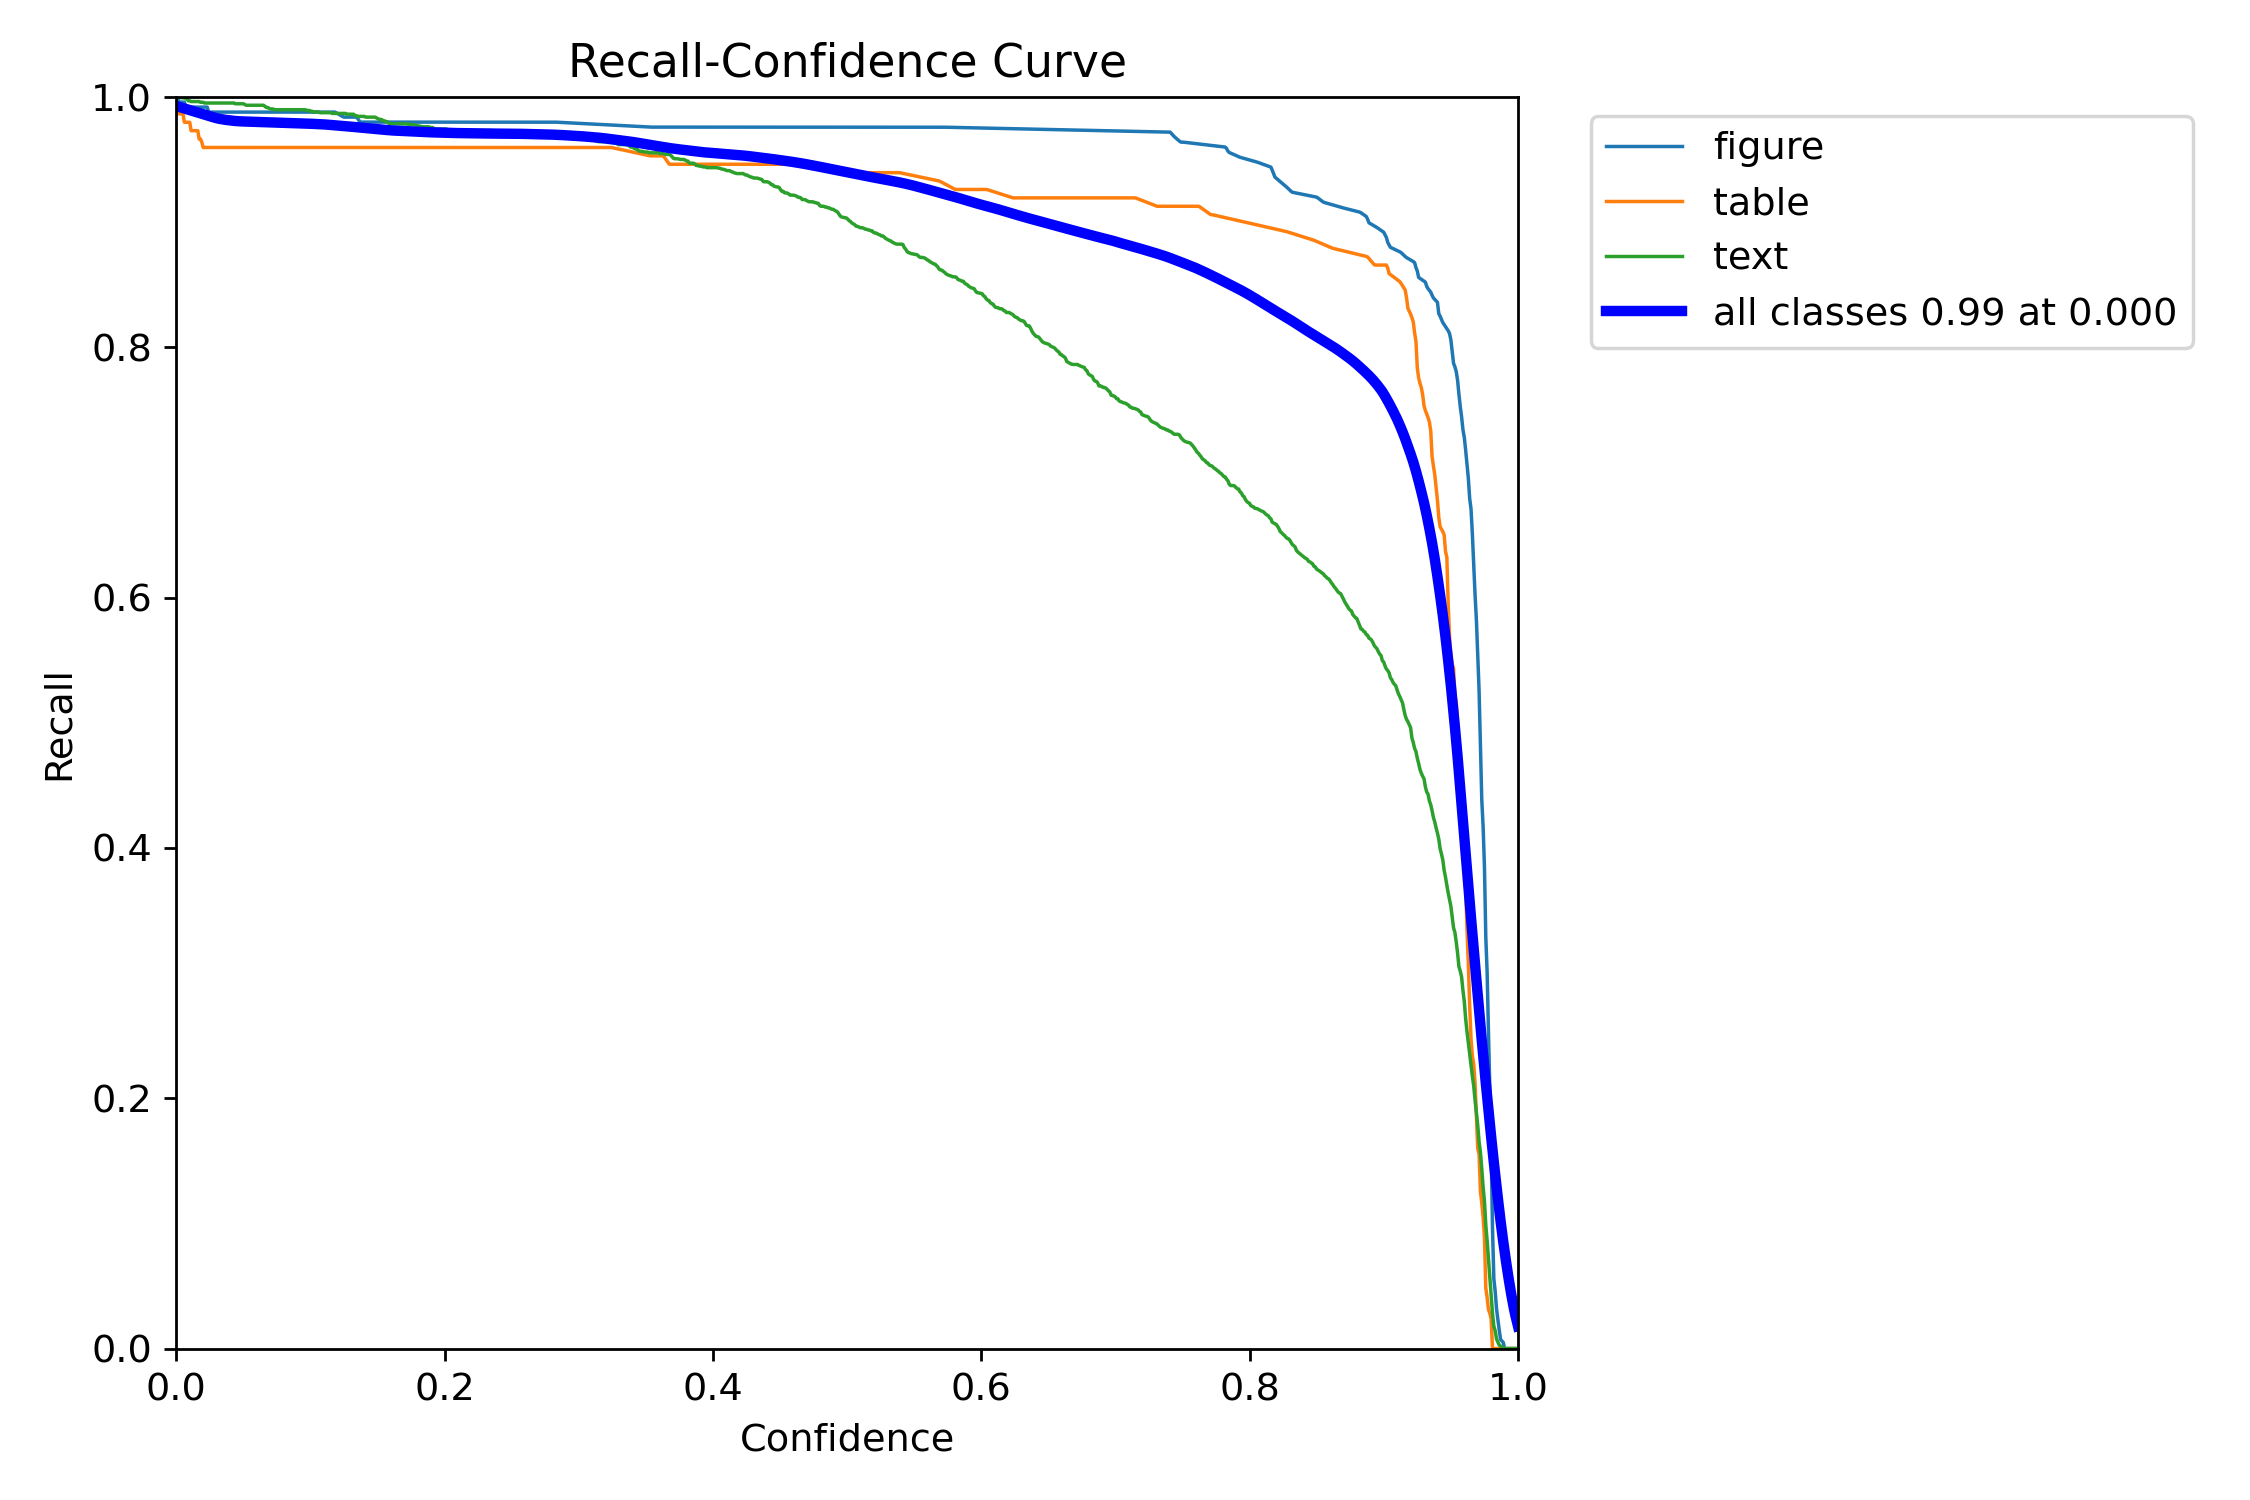

In [17]:
IPyImage(filename="/content/runs/detect/train/R_curve.png", width=700)

**Precision-Confidence curve**

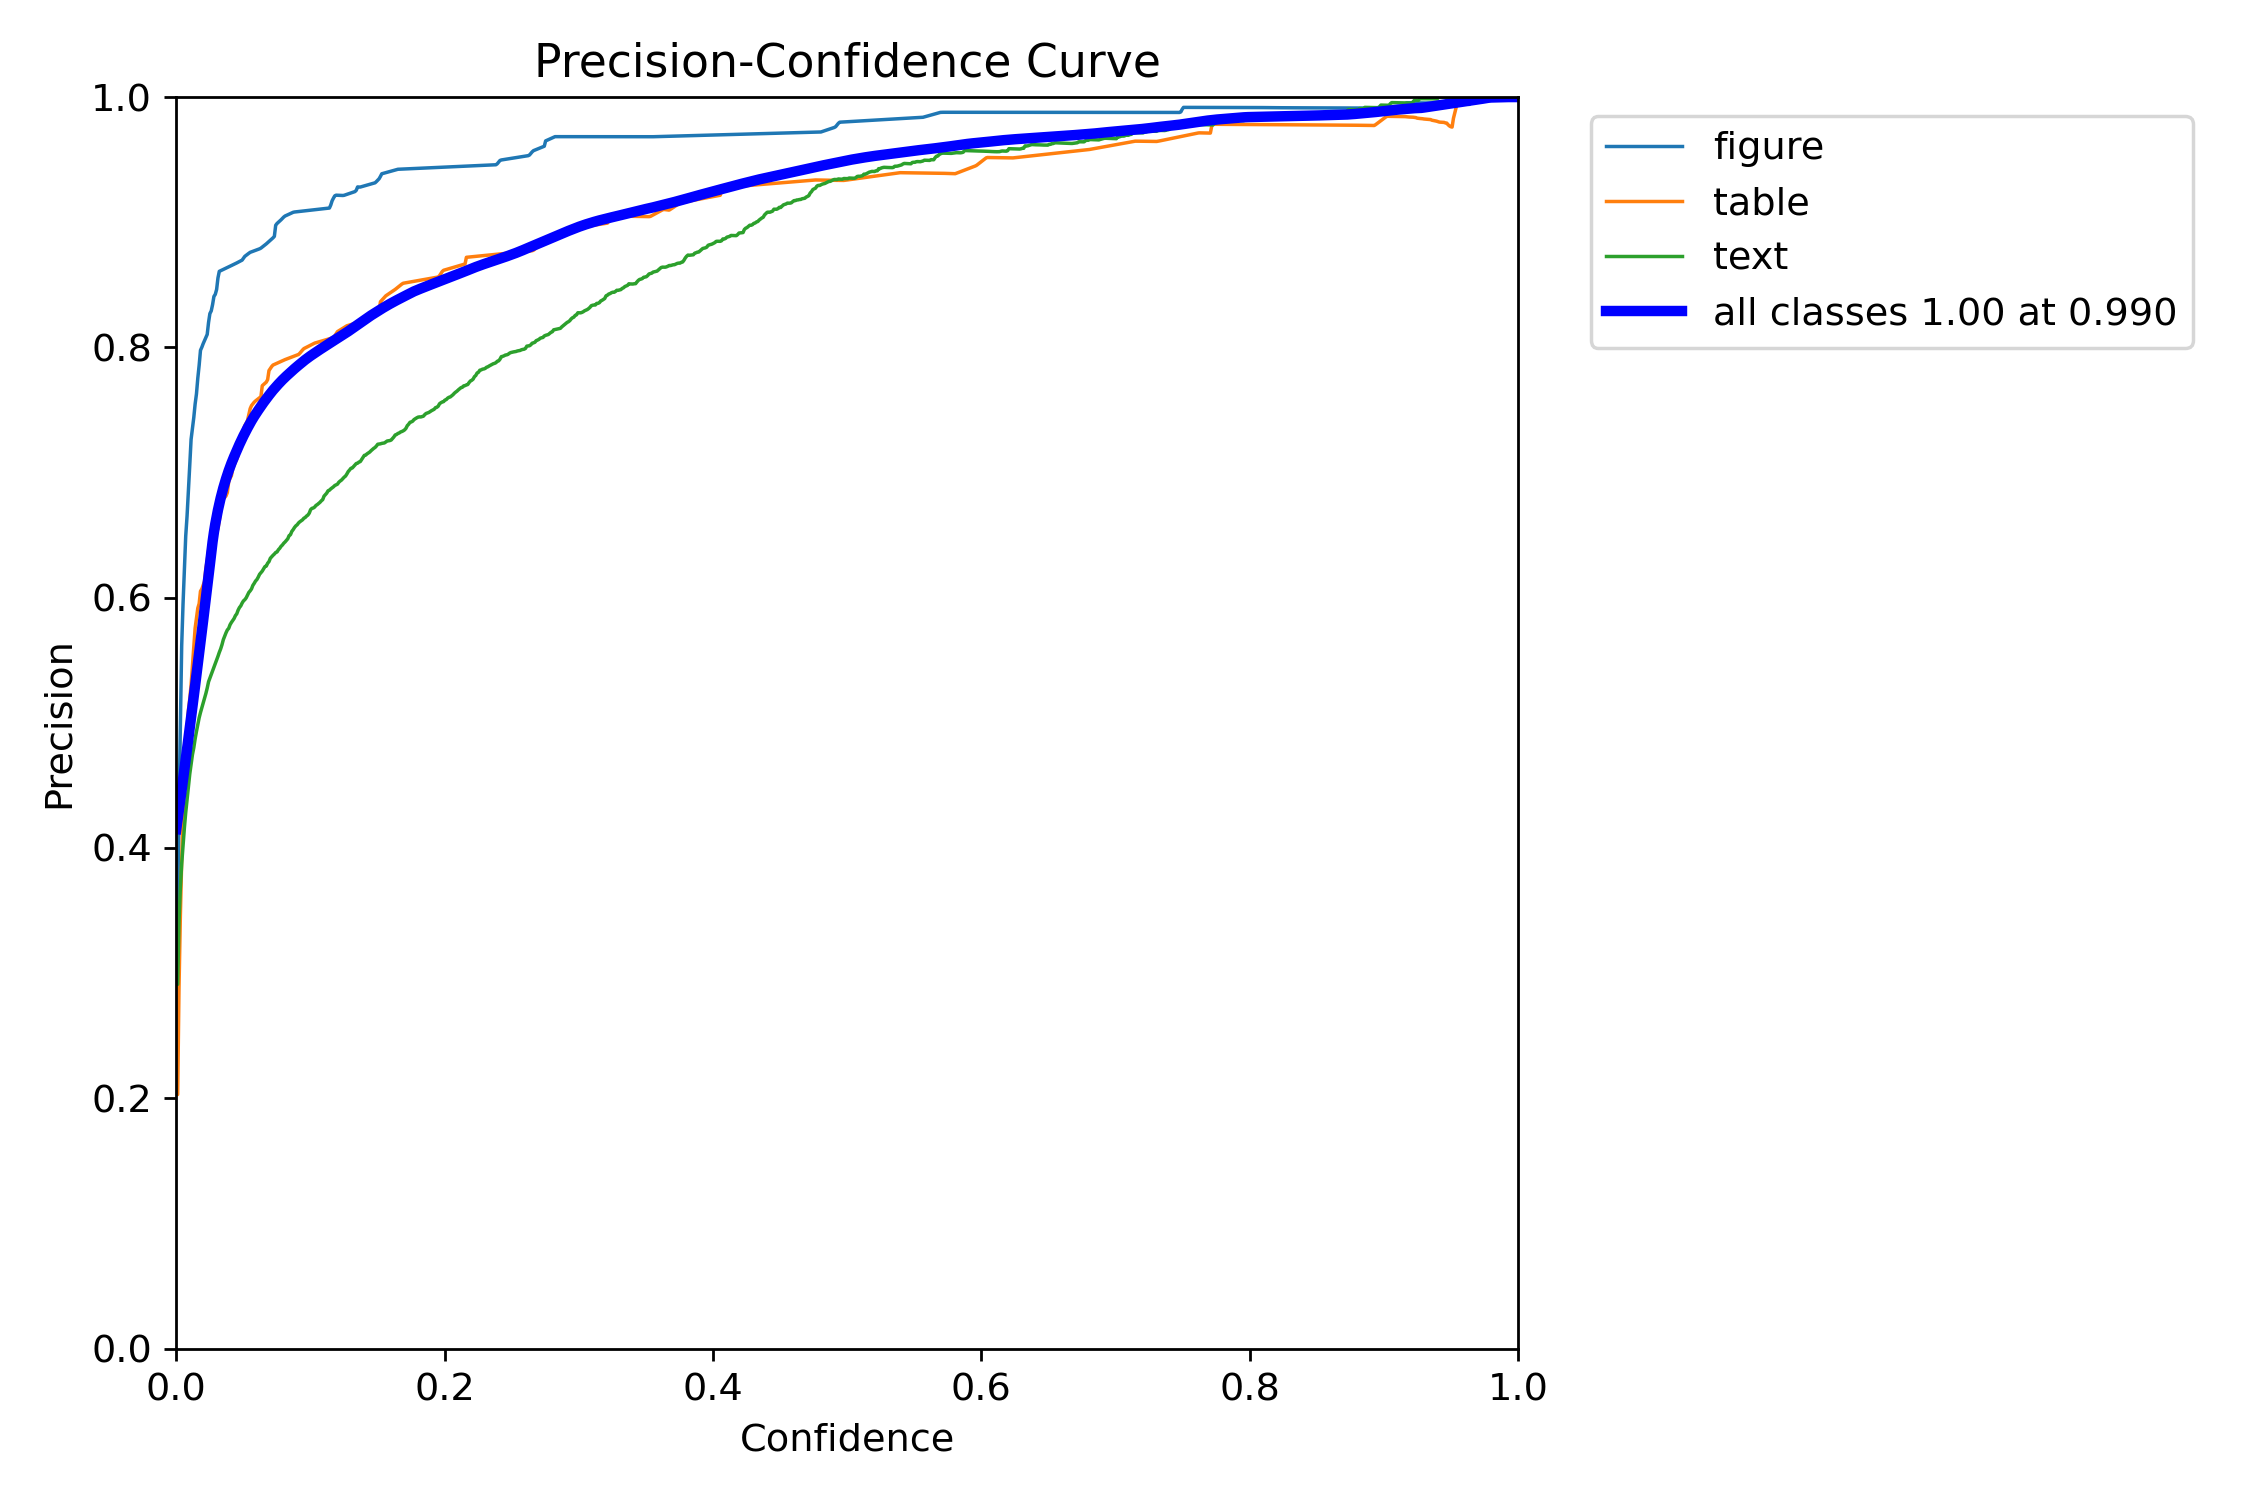

In [18]:
IPyImage(filename="/content/runs/detect/train/P_curve.png", width=700)

**Confusion matrix**

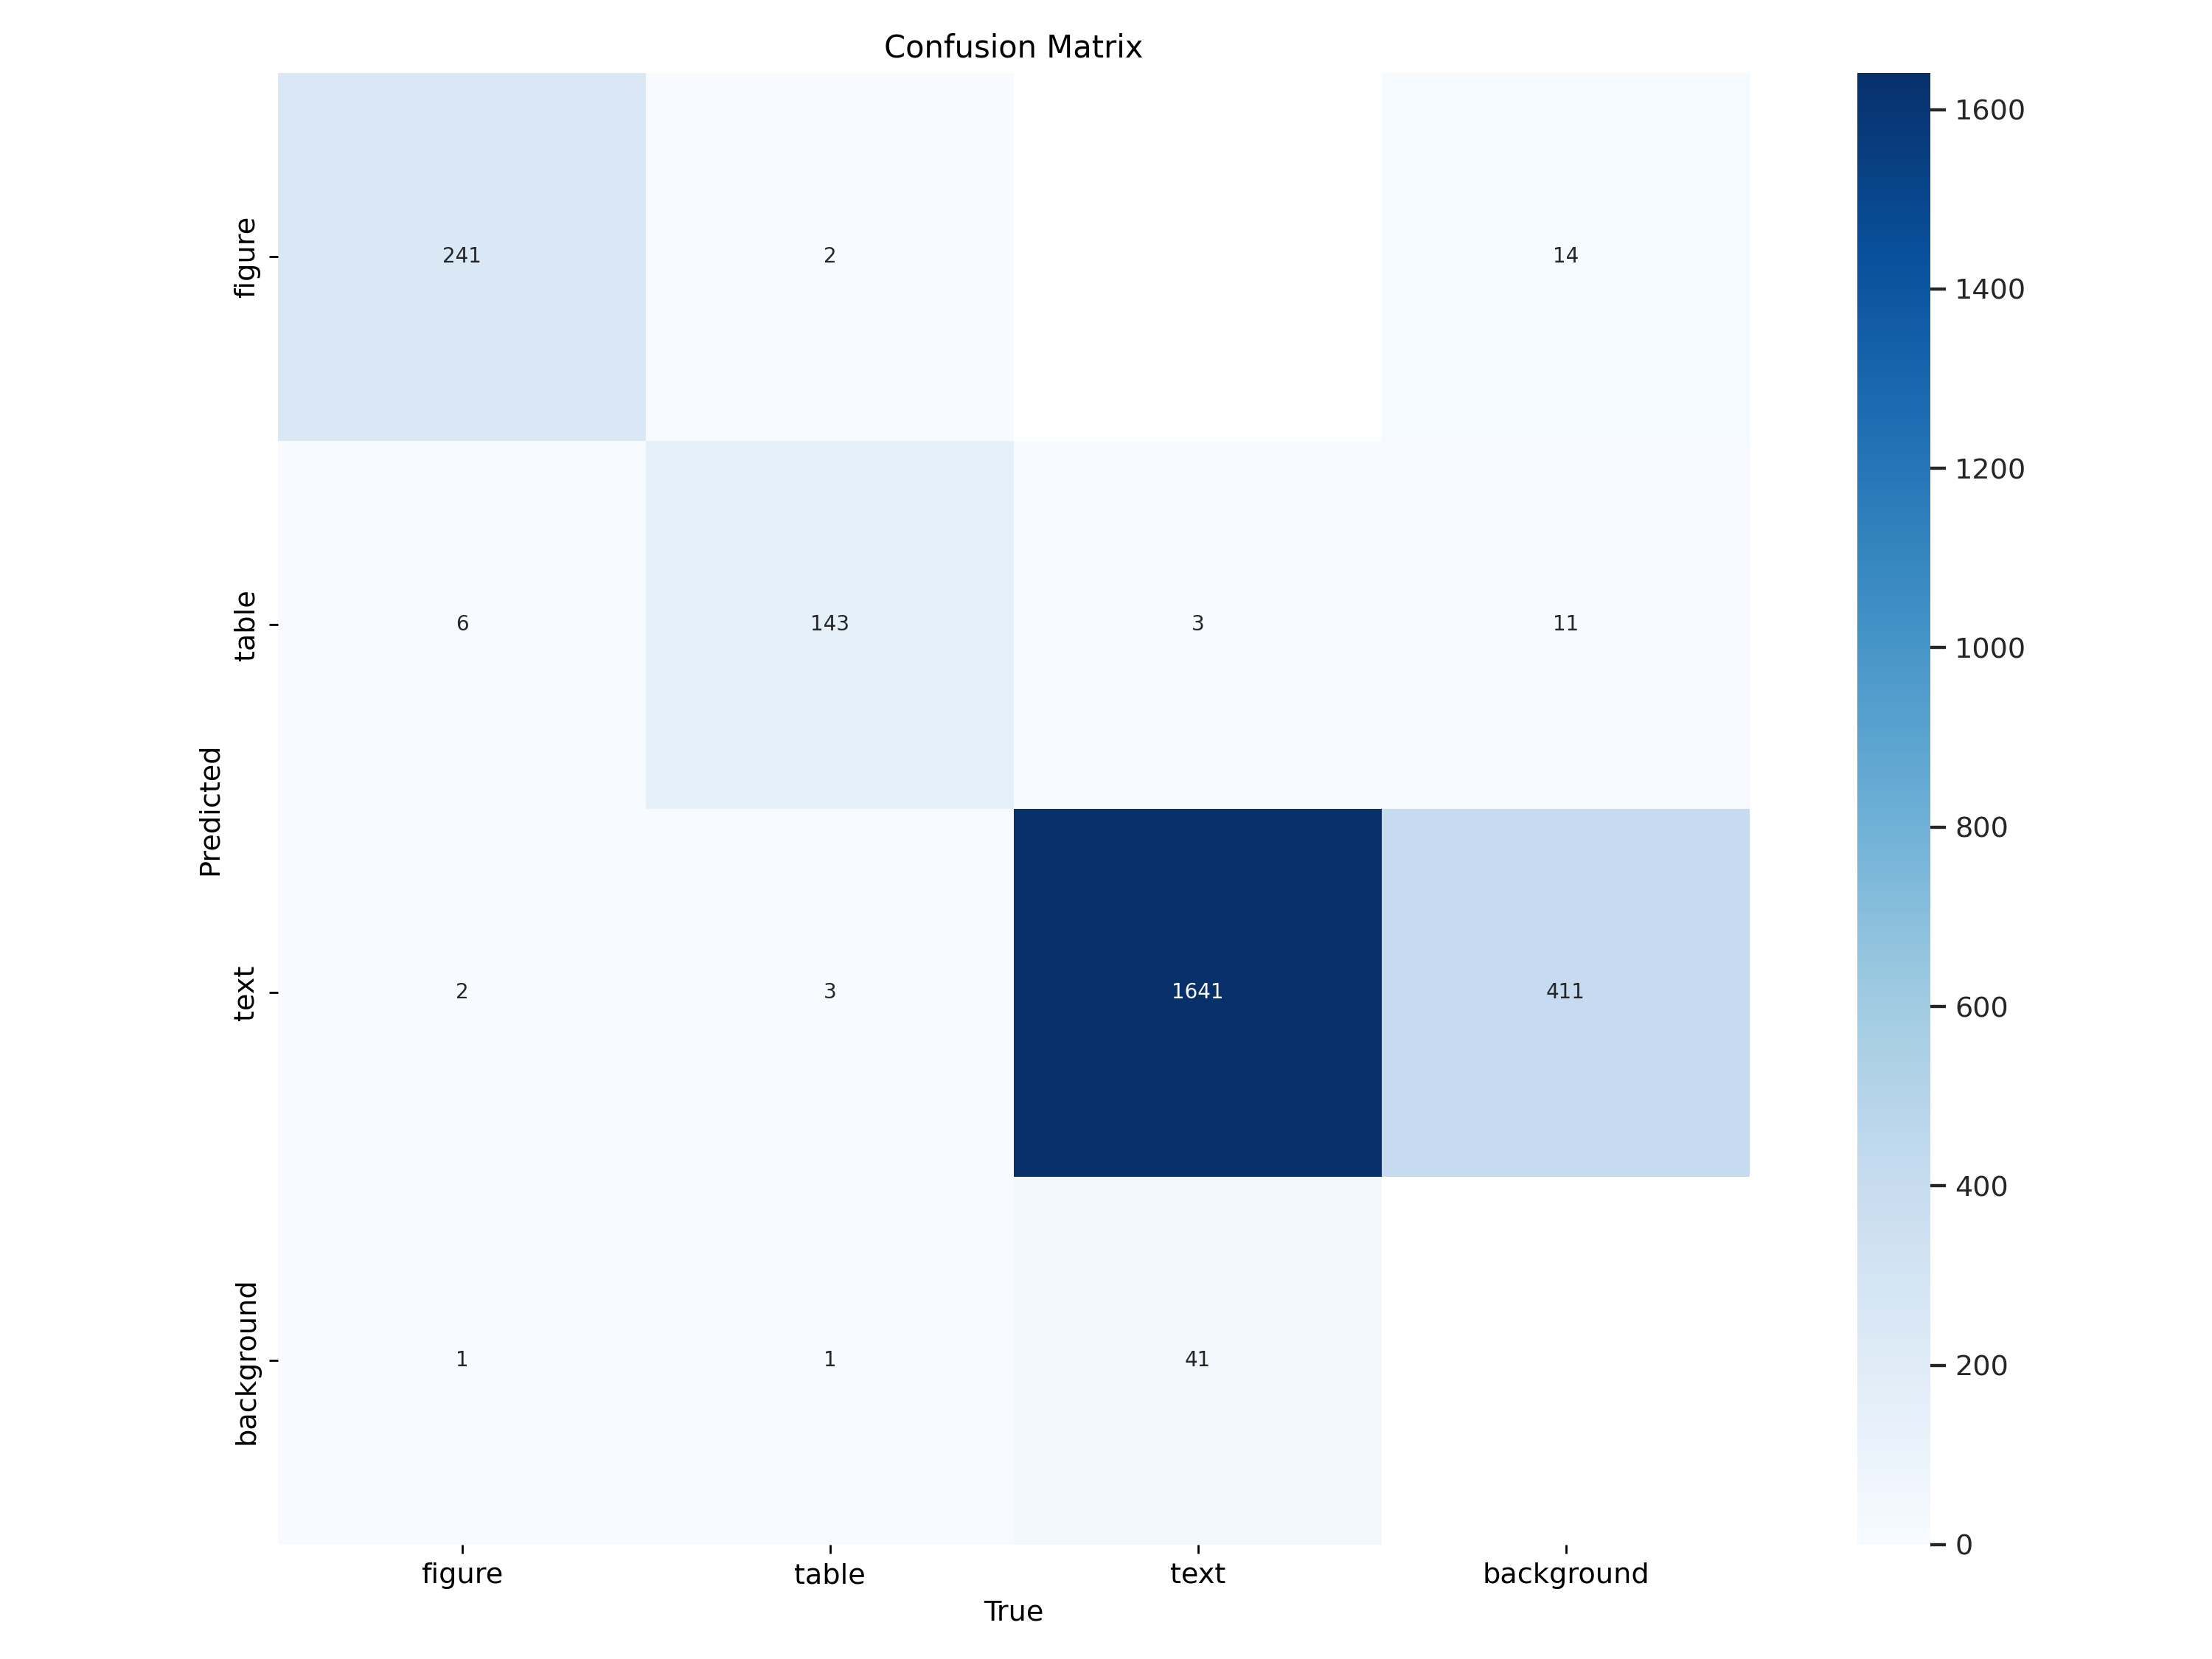

In [19]:
IPyImage(filename="/content/runs/detect/train/confusion_matrix.png", width=800)

**result metrics**

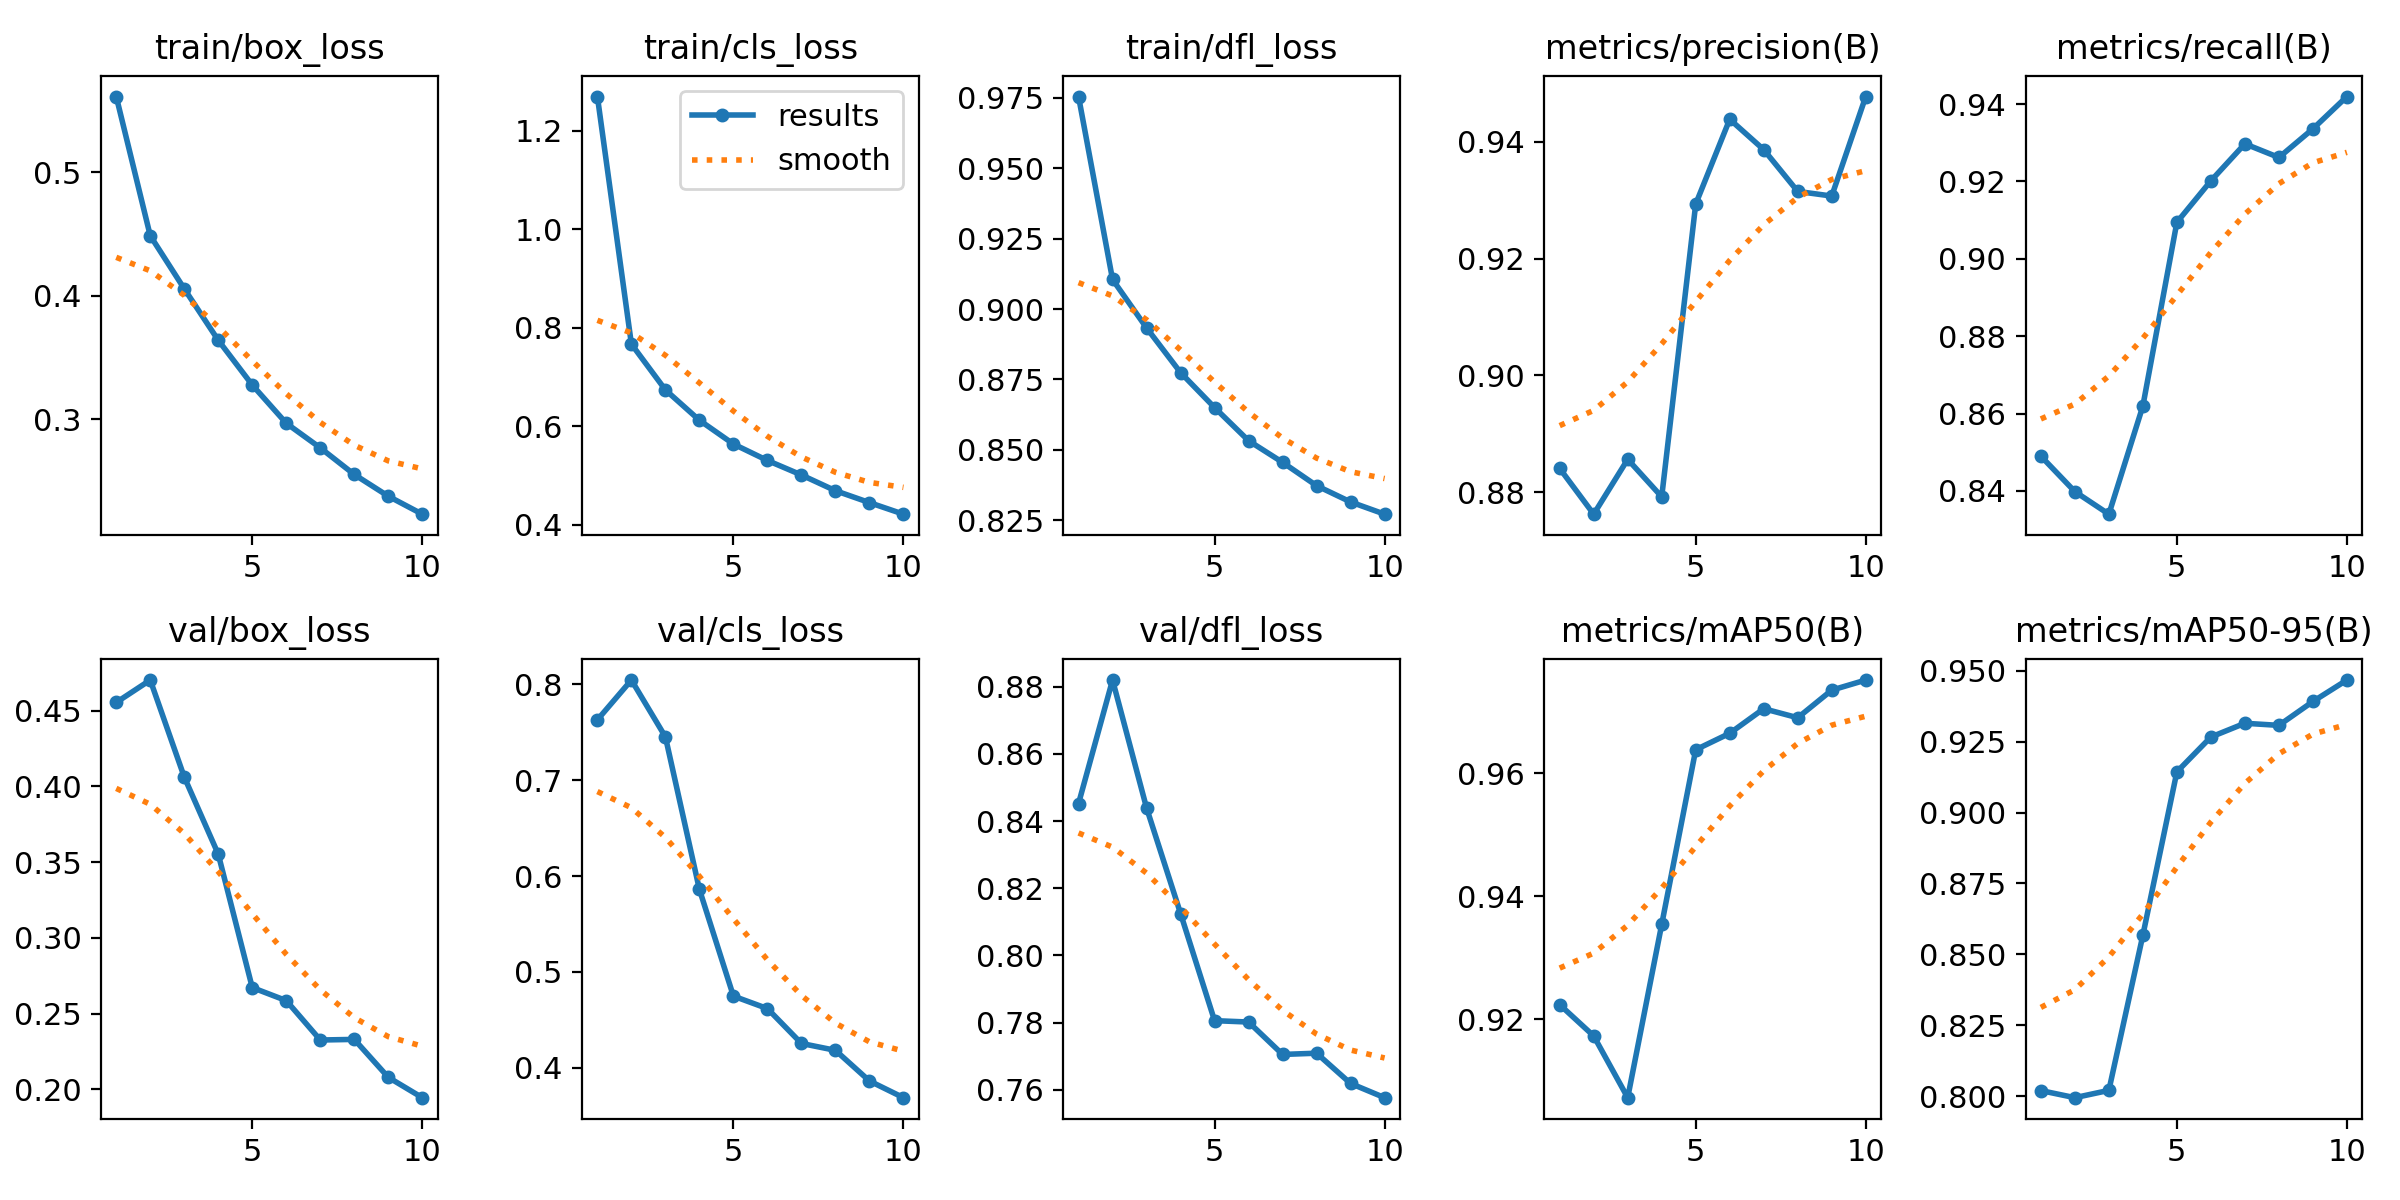

In [20]:
IPyImage(filename="/content/runs/detect/train/results.png", width=900)

**validation batch prediction**

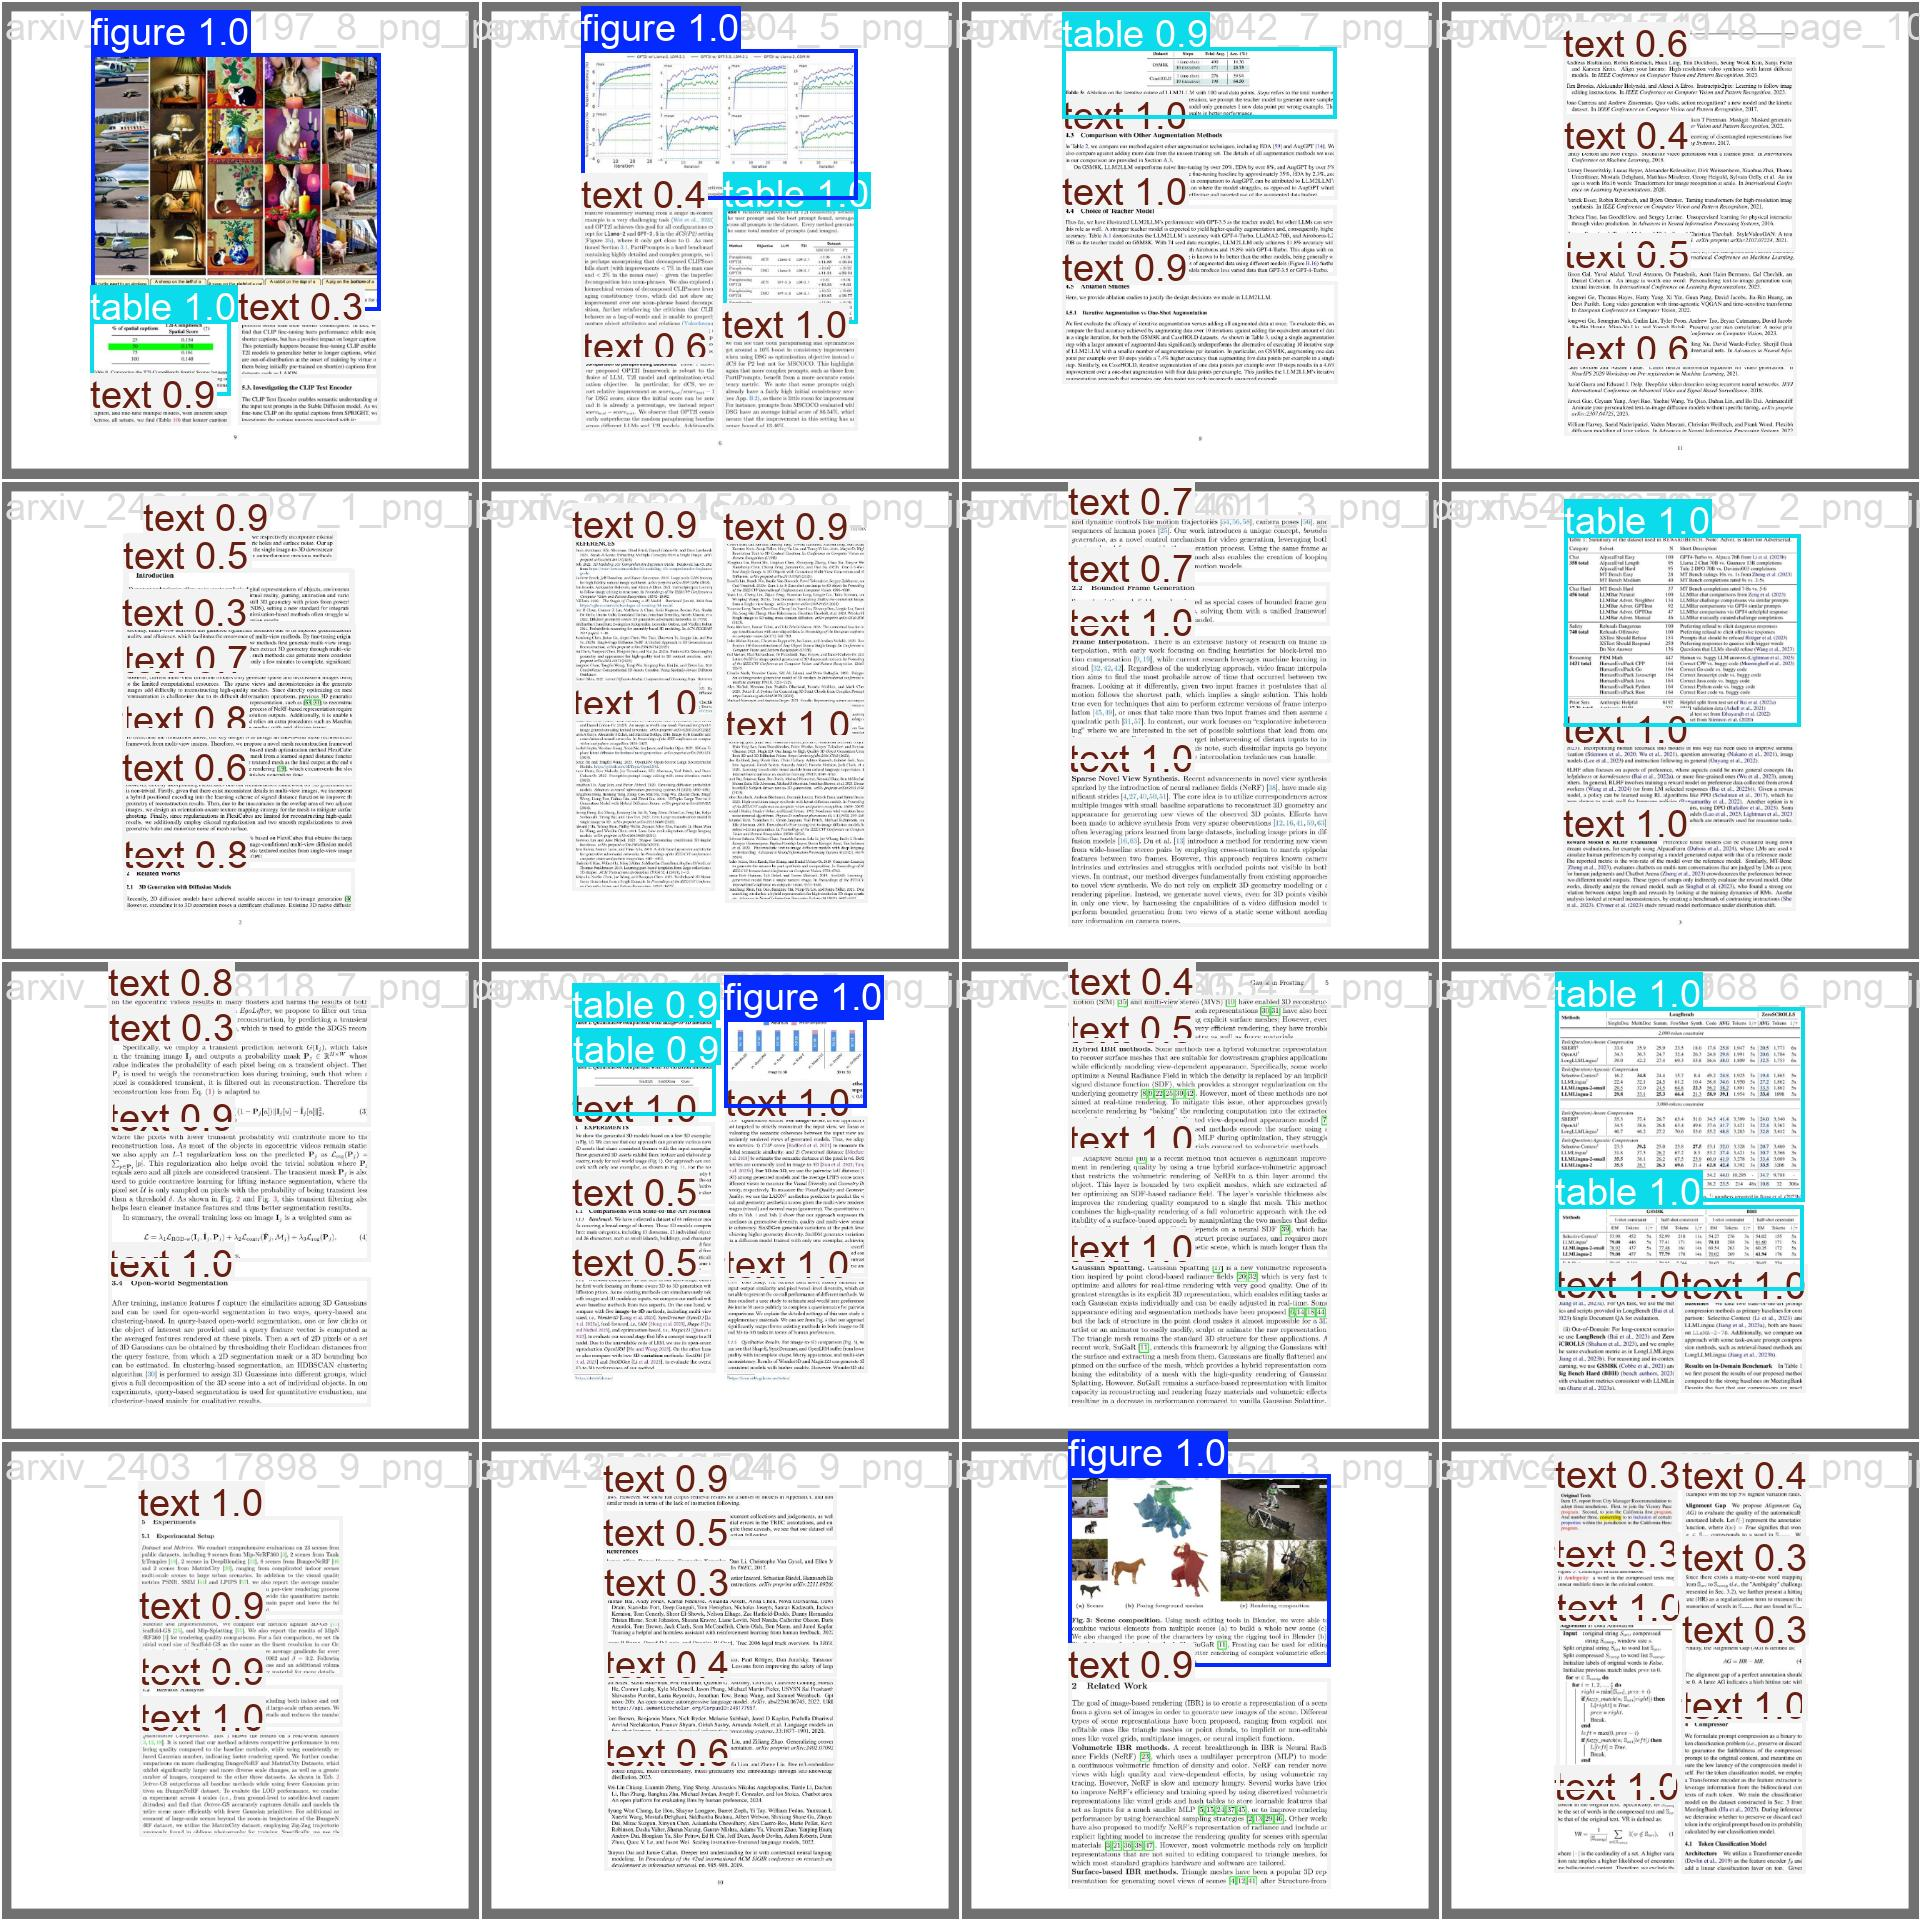

In [21]:
IPyImage(filename="/content/runs/detect/train/val_batch1_pred.jpg", width=1000)

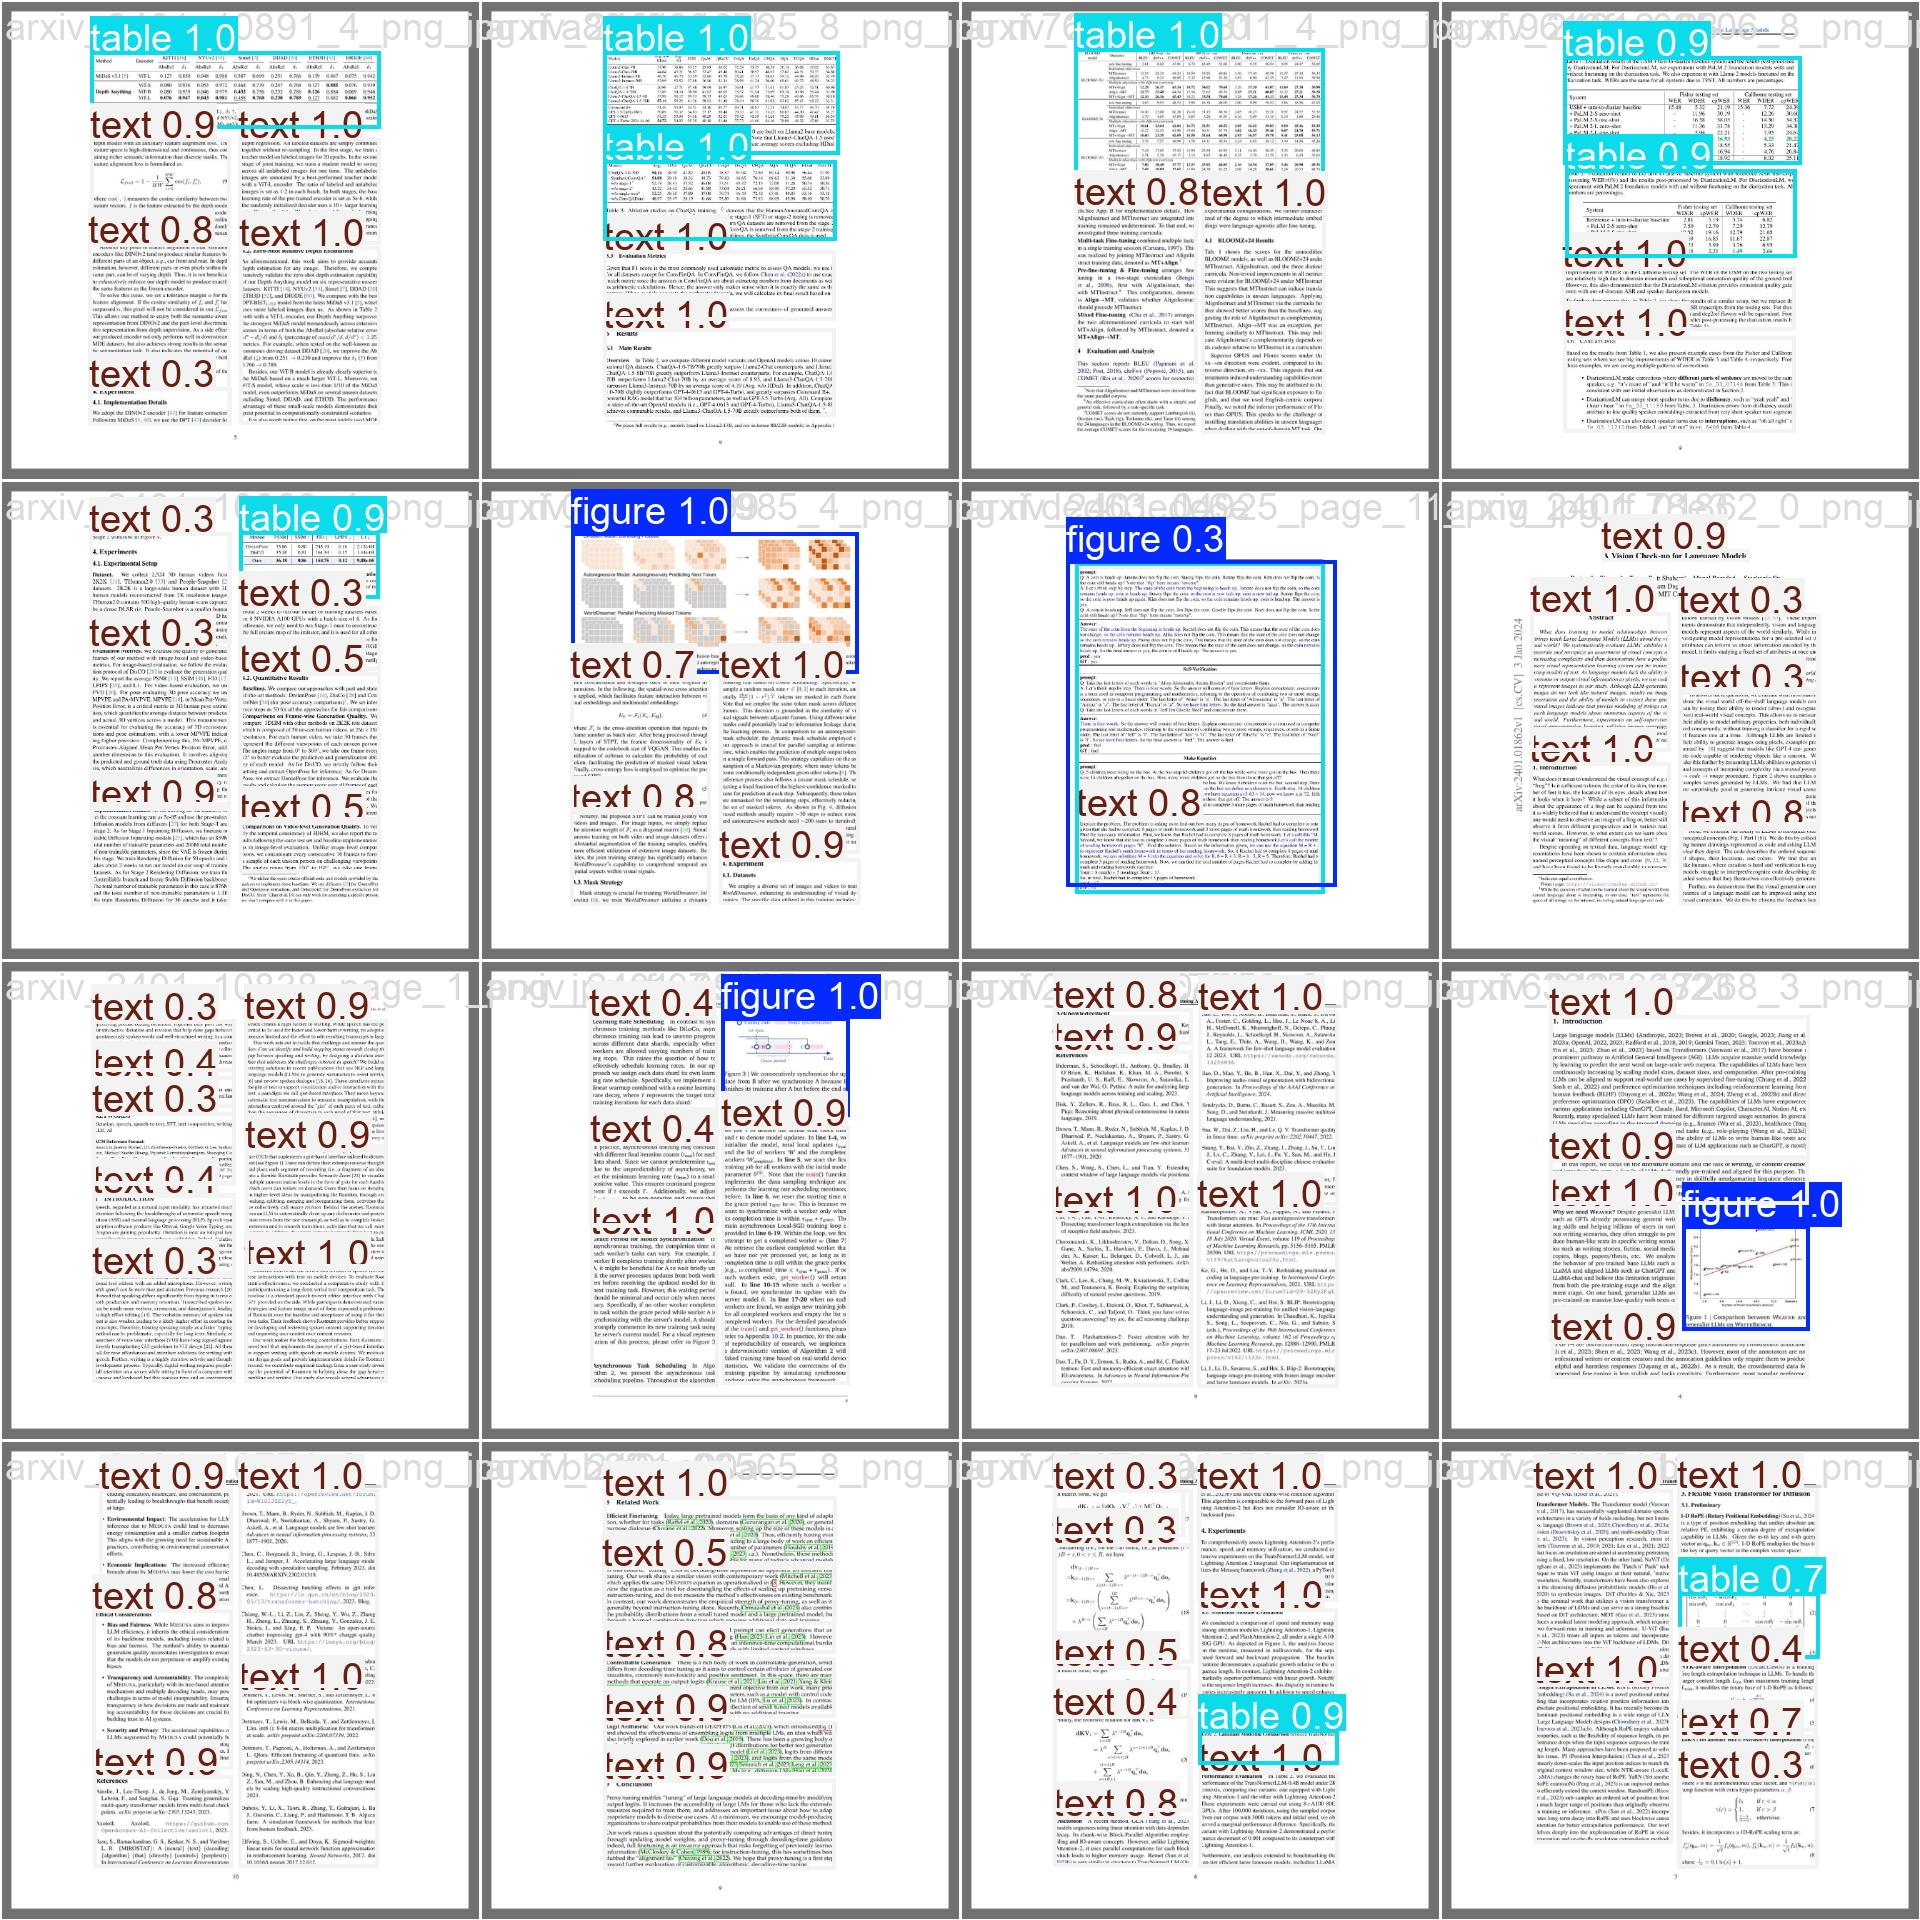

In [22]:
IPyImage(filename="/content/runs/detect/train/val_batch2_pred.jpg", width=1000)

# validation subset result

In [23]:
# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

#validation_results = model.val(data="coco8.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")
validation_results = model.val(data="/content/data-tables-1/data.yaml")

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/data-tables-1/valid/labels.cache... 431 images, 2 backgrounds, 0 corrupt: 100%|██████████| 431/431 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]


                   all        431       2084      0.948      0.942      0.975      0.946
                figure        196        250      0.976      0.976      0.991      0.978
                 table        106        149      0.933       0.94      0.965      0.948
                  text        422       1685      0.934      0.909       0.97      0.914
Speed: 0.5ms preprocess, 5.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val


# prediction test


0: 640x512 5 texts, 24.4ms
1: 640x512 2 figures, 6 texts, 24.4ms
2: 640x512 2 tables, 7 texts, 24.4ms
Speed: 5.7ms preprocess, 24.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


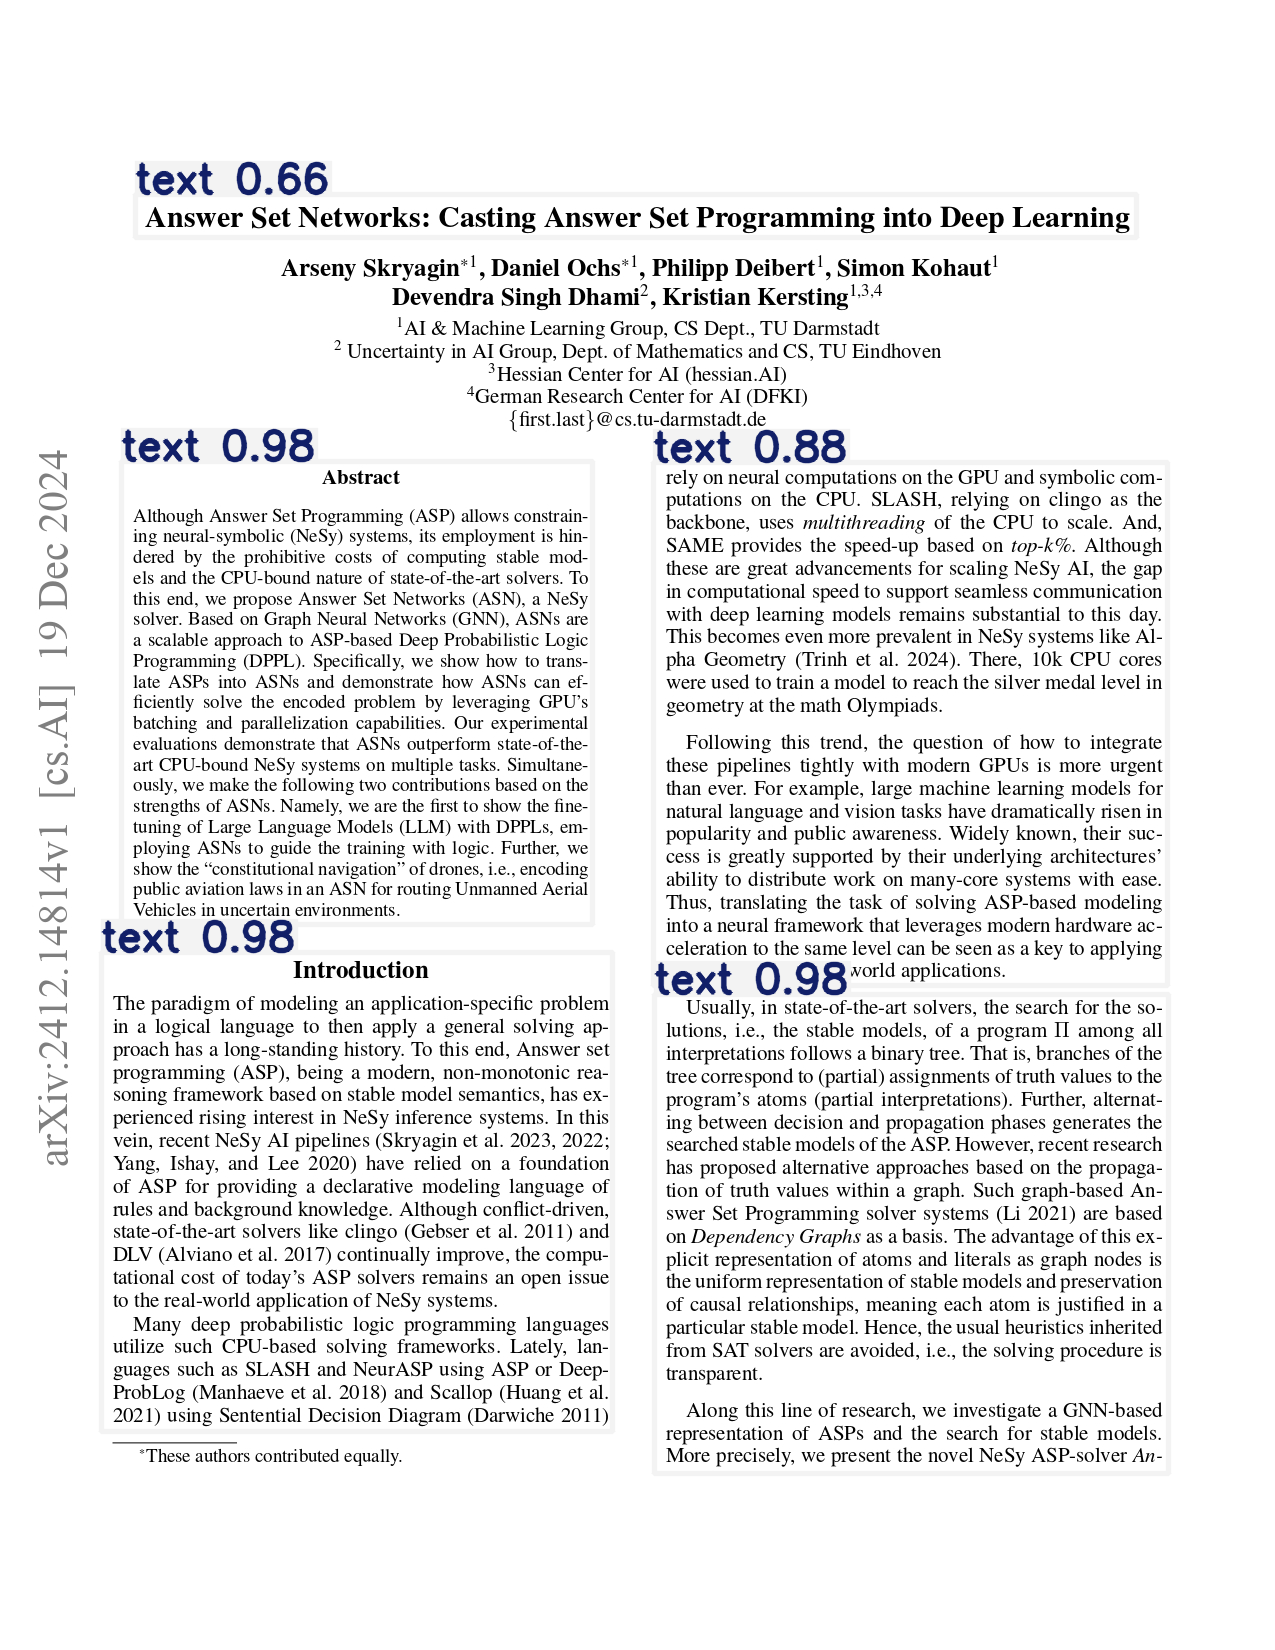

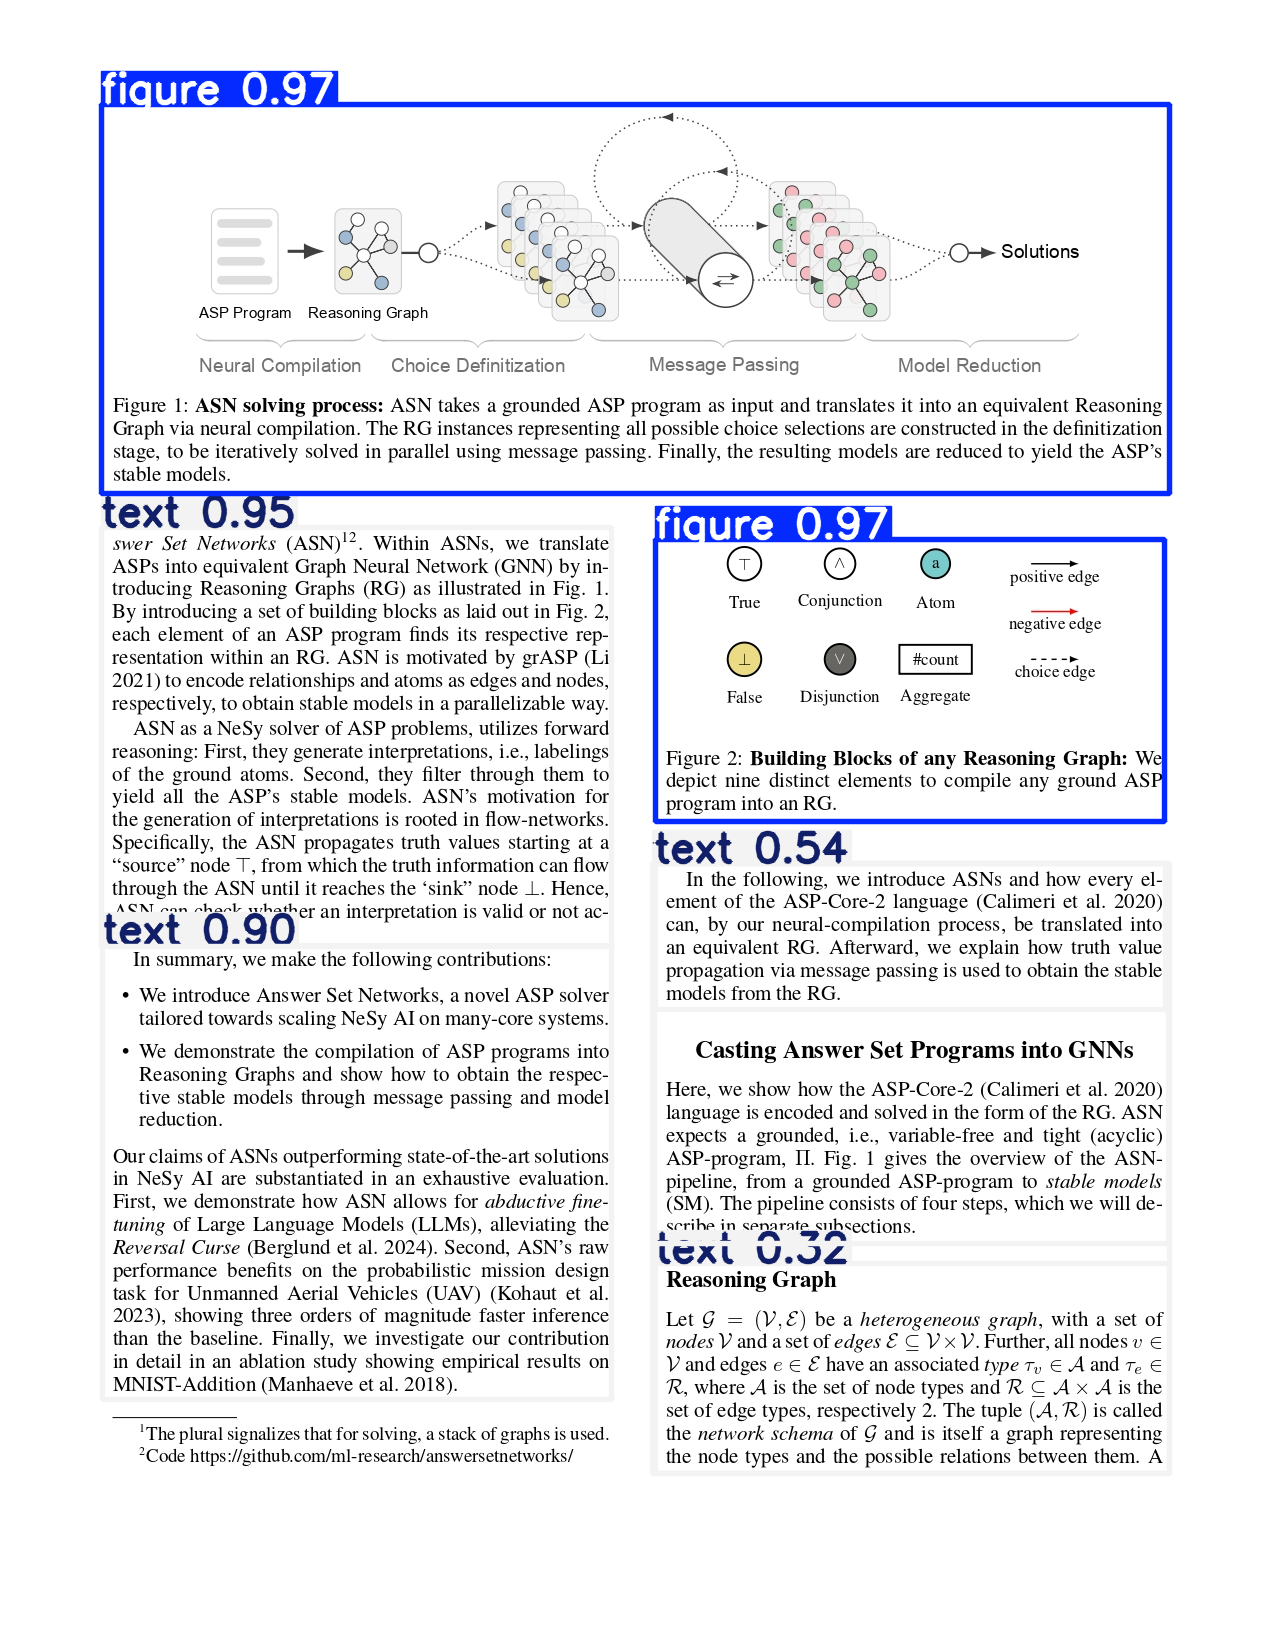

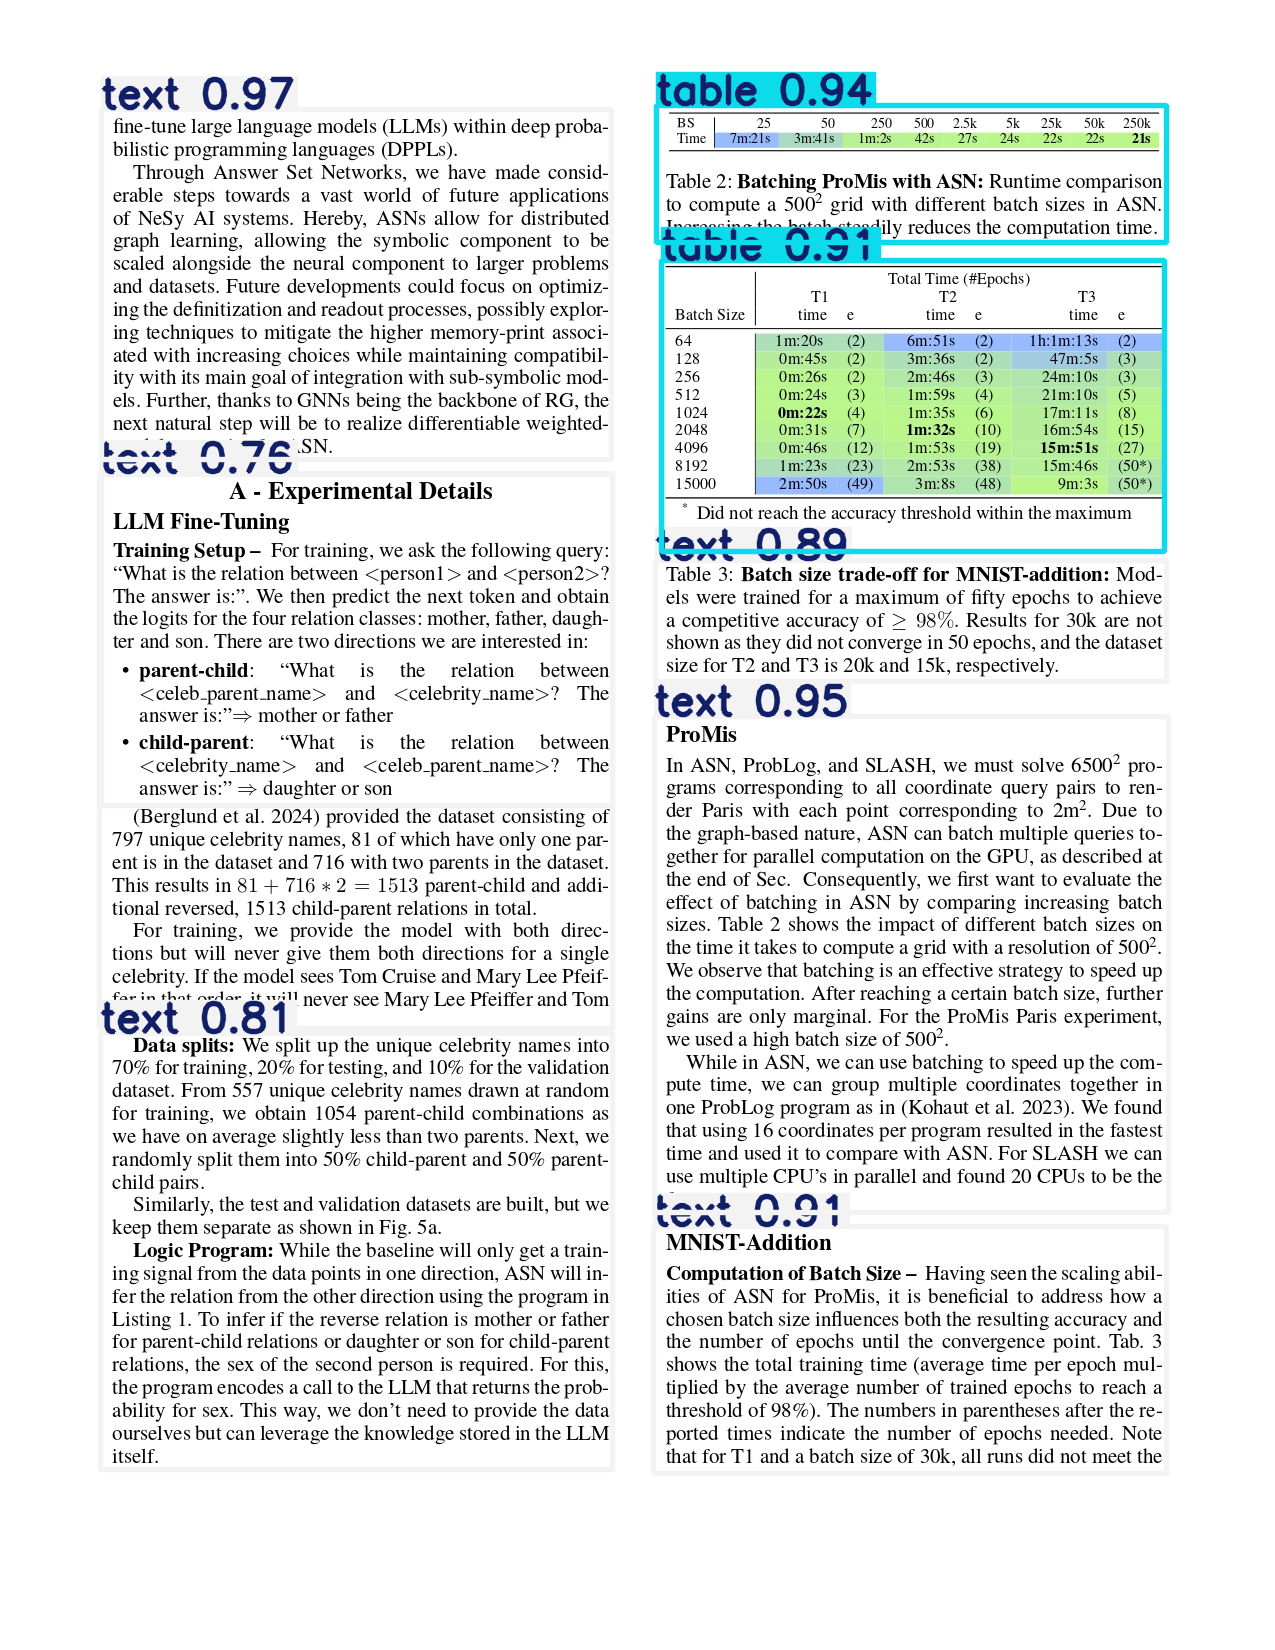

In [24]:
model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
imgs=["/content/data-tables-1/test-images/arXiv_page-0001.jpg","/content/data-tables-1/test-images/arXiv_page-0002.jpg",
      "/content/data-tables-1/test-images/arXiv_page-0008.jpg"]
results = model(imgs)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk